## import libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## import dataset

In [6]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1")
df.columns=["polarity", "id", "date", "flag", "user", "text"]

In [7]:
df.head()

,polarity,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [8]:
df.shape

(1599999, 6)

In [9]:
df.isnull().sum()

polarity    0
id          0
date        0
flag        0
user        0
text        0
dtype: int64

<AxesSubplot:xlabel='polarity', ylabel='count'>

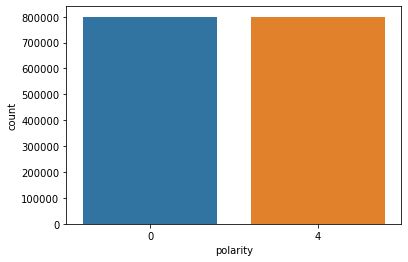

In [10]:
sns.countplot(x='polarity', data=df)

In [11]:
df['polarity'] = df['polarity'].replace(4,1)

In [12]:
df= df[['text','polarity']]

In [13]:

stop_words = stopwords.words('english')
ps = PorterStemmer()
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"    

In [14]:
def preprocess(text, stem=False):
        text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
        tokens = []
        for token in text.split():
            if token not in stop_words:
                    if stem:
                        tokens.append(stemmer.stem(token))
                    else:
                        tokens.append(token)
        return " ".join(tokens)

In [16]:
df.text = df.text.apply(lambda x: preprocess(x))

In [17]:
df.tail()

,text,polarity
1599994,woke school best feeling ever,1
1599995,thewdb com cool hear old walt interviews,1
1599996,ready mojo makeover ask details,1
1599997,happy 38th birthday boo alll time tupac amaru ...,1
1599998,happy charitytuesday thenspcc sparkscharity sp...,1


In [18]:
x=df.text
y=df.polarity

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [26]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [28]:
pred = pipe_lr.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("accuracy score : " , accuracy_score(y_test, pred))

accuracy score :  0.776965625


In [31]:
import pickle
#pickle.dump(classifier,open('classifer_model.pkl','wb'))
ex1 = "This book was so interesting it made me happy"
predec=pipe_lr.predict([ex1])
print(predec[0])

1


In [32]:
import joblib
pipeline_file = open("emotion_classifier.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()